In [138]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
#Assign the names of the columns and import the dataset.
names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year', 'origin', 'car_name']
data = pd.read_csv('drive/My Drive/College/Machine Learning/cars.csv', names = names,index_col=False)

#Drop any features that may not be of use in numerical calculations.  Extracting meaningful data from car_name would refer to Natural
#Language Processing, which is too complicated for a simple regression model.
data = data.drop(['car_name', 'origin'], axis=1)

#Remove any rows with NA/? values and convert string to float values.  
#Alternative: Take the average value of the columns and assign it.
data = data.dropna(how='all')
data = data[data.horsepower != '?']
data['horsepower'] = data['horsepower'].astype('float64') 
print(data.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70


In [0]:
#Split into data and targets. iloc allows selection of specific rows and columns.  Our target is mpg; we want to predict the mpg of a
#car given its specifications.
X = data.iloc[ : ,  1 :  ].values
Y = data.iloc[ : , 0 ].values

#Split the data into training and testing.
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0) 

In [141]:
#Preview the shapes to ensure linear algebra will function properly.
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(294, 6)
(294,)
(98, 6)
(98,)


[-0.20058761  0.00128133  0.00674623 -0.00665921  0.13115667  0.71659333]
-13.173500815969565
Training Dataset Mean squared error: 11.55
Testing Dataset Mean squared error: 11.97


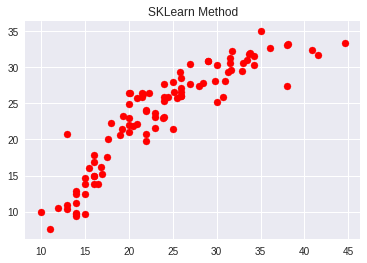

In [142]:
#Generate our model while normalizing the data.
model = linear_model.LinearRegression(normalize='true')

#Train the model on the training dataset and targets.
model.fit(X_train, Y_train)

#View our weights and biases after training.
print(model.coef_)
print(model.intercept_)

#Have our model predict values and calculate the mean squared error.
from sklearn.metrics import mean_squared_error
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
print("Training Dataset Mean squared error: %.2f" % mean_squared_error(train_predictions, Y_train))
print("Testing Dataset Mean squared error: %.2f" % mean_squared_error(test_predictions, Y_test))


#Plot the actual mpg with our predicted mpg on the testing dataset to determine linearity.
plt.scatter(Y_test, test_predictions,  color='red')
plt.xlabel('')
plt.ylabel('')
plt.title('SKLearn Method')

plt.show()


In [143]:
#Try a different model...
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=4000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [144]:
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

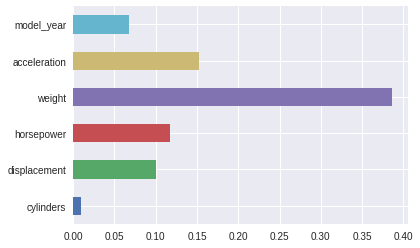

In [145]:
#Predict mpg with new model
gbr_predictions_test = gb_regressor.predict(X_test)

#Determine which feature is most important.
names = list(data)
names.remove('mpg')
fi= pd.Series(gb_regressor.feature_importances_,index=names)
fi.plot.barh()

MSE: 9.09868


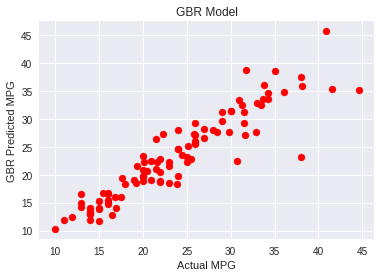

In [146]:
print("MSE: %.5f" % mean_squared_error(Y_test,gbr_predictions_test))

plt.scatter(Y_test, gbr_predictions,  color='red')
plt.xlabel('Actual MPG')
plt.ylabel('GBR Predicted MPG')
plt.title('GBR Model')

plt.show()